# Statistic Analysis
Here, I did some statistic anaylsis about the dataset we use for following experiments.

In [47]:
# import all the required packages
import sys
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '2,4'  # for several GPUs

In [48]:
import pandas as pd
import numpy as np
import json, csv
import torch
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [49]:
# check the running environment
print(sys.executable)
print(torch.cuda.is_available())

/home/user/jinqli/anaconda3/envs/new_env/bin/python
True


In [50]:
onet_path = "/srv/scratch2/jinq/taskontology/onet_occ_tasks_workactivities_en.jsonl.bz2"
tasks_path = "/srv/scratch2/jinq/taskontology/taskdictionary.jsonl"
dwa_path = '/srv/scratch2/jinq/taskontology/DWA Reference.xlsx'
tasks_dwa_path = "/srv/scratch2/jinq/taskontology/Tasks to DWAs.xlsx"
jobads_path = '/srv/scratch2/jinq/taskontology/jobad_taskdata/task_sample-0.2.jsonl'

## Basic info about relevant files

In [51]:
onet = pd.read_json(onet_path,lines=True)
print('numbers of records in onet:', onet.shape[0])
onet.head()

numbers of records in onet: 22210


,id,type,language,text
0,11-1011.00,SOCCode,en,Chief Executives
1,20461,Task,en,"Review and analyze legislation, laws, or publi..."
2,8823,Task,en,Direct or coordinate an organization's financi...
3,8824,Task,en,"Confer with board members, organization offici..."
4,8825,Task,en,Analyze operations to evaluate performance of ...


In [52]:
tasks = pd.read_json(tasks_path,lines=True)
print('numbers of records in task dictionary:', tasks.shape[0])
tasks.head()

numbers of records in task dictionary: 17565


,task,dwa,iwa,gwa,occupation
0,"Review and analyze legislation, laws, or publi...",[Analyze impact of legal or regulatory changes...,[Assess characteristics or impacts of regulati...,"[Analyzing Data or Information, Providing Cons...",[Chief Executives]
1,Direct or coordinate an organization's financi...,[Direct financial operations.],[Manage budgets or finances.],"[Guiding, Directing, and Motivating Subordinates]",[Chief Executives]
2,"Confer with board members, organization offici...",[Confer with organizational members to accompl...,[Communicate with others about operational pla...,"[Communicating with Supervisors, Peers, or Sub...",[Chief Executives]
3,Analyze operations to evaluate performance of ...,[Analyze data to assess operational or project...,[Analyze data to improve operations.],[Analyzing Data or Information],[Chief Executives]
4,"Direct, plan, or implement policies, objective...",[Implement organizational process or policy ch...,"[Implement procedures or processes., Develop o...","[Making Decisions and Solving Problems, Develo...",[Chief Executives]


In [53]:
dwa = pd.read_excel(dwa_path)
print('numbers of records in dwa references:', dwa.shape[0])
dwa.head()

numbers of records in dwa references: 2087


,Element ID,Element Name,IWA ID,IWA Title,DWA ID,DWA Title
0,4.A.1.a.1,Getting Information,4.A.1.a.1.I01,Study details of artistic productions.,4.A.1.a.1.I01.D01,Review art or design materials.
1,4.A.1.a.1,Getting Information,4.A.1.a.1.I01,Study details of artistic productions.,4.A.1.a.1.I01.D02,Study details of musical compositions.
2,4.A.1.a.1,Getting Information,4.A.1.a.1.I01,Study details of artistic productions.,4.A.1.a.1.I01.D03,Review production information to determine cos...
3,4.A.1.a.1,Getting Information,4.A.1.a.1.I01,Study details of artistic productions.,4.A.1.a.1.I01.D04,Study scripts to determine project requirements.
4,4.A.1.a.1,Getting Information,4.A.1.a.1.I01,Study details of artistic productions.,4.A.1.a.1.I01.D05,Review audio or video recordings.


In [54]:
# This file maps each Detailed Work Activity (DWA) to the task statements, and consequently to the O*NET-SOC occupations, requiring that activity. 
# Each DWA is mapped to multiple task statements, and each referenced task statement is mapped to one or more DWAs.

task_to_dwa = pd.read_excel(tasks_dwa_path)
print('numbers of records in tasks to DWAs:', task_to_dwa.shape[0])
task_to_dwa.head()

numbers of records in tasks to DWAs: 23543


,O*NET-SOC Code,Title,Task ID,Task,DWA ID,DWA Title,Date,Domain Source
0,11-1011.00,Chief Executives,20461,"Review and analyze legislation, laws, or publi...",4.A.2.a.4.I09.D03,Analyze impact of legal or regulatory changes.,07/2014,Analyst
1,11-1011.00,Chief Executives,20461,"Review and analyze legislation, laws, or publi...",4.A.4.b.6.I08.D04,Advise others on legal or regulatory complianc...,07/2014,Analyst
2,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,4.A.4.b.4.I09.D02,Direct financial operations.,03/2014,Analyst
3,11-1011.00,Chief Executives,8824,"Confer with board members, organization offici...",4.A.4.a.2.I03.D14,Confer with organizational members to accompli...,03/2014,Analyst
4,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,4.A.2.a.4.I07.D09,Analyze data to assess operational or project ...,03/2014,Analyst


In [55]:
jobads = pd.read_json(jobads_path,lines=True)
print('numbers of records in job ads:', jobads.shape[0])
jobads[3:8]

numbers of records in job ads: 3711


,id,text,label,start,end
3,sjmm-22002109740005,Qualitätskontrolle,Object,2627,2645
4,sjmm-22002109740005,Qualitätskontrolle in jeder Produktionsphase g...,TASK,2627,2685
5,sjmm-22002109740005,in jeder Produktionsphase,Context,2646,2671
6,sjmm-22002109740005,gewährleisten,Activitiy,2672,2685
7,sjmm-22002109740005,Produktivität unserer Produktionsmaschinen ver...,TASK,2690,2743


## Length Distribution

In [80]:
# length distribution

print('Task(en) length distribution task(en): ')
en_length = task_to_dwa.Task.str.split().str.len()
en_length

Task(en) length distribution task(en): 


0        23
1        23
2        17
3        17
4        27
         ..
23538    22
23539     8
23540    20
23541    22
23542    22
Name: Task, Length: 23543, dtype: int64

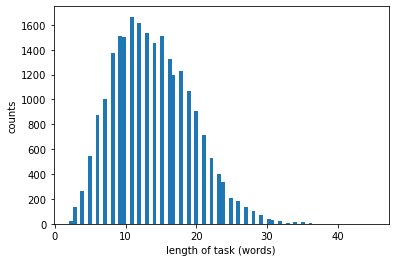

In [83]:
plt.hist(en_length,bins=80)
plt.xlabel('length of task (words)')
plt.ylabel('counts')
plt.savefig('imgs/len_en.png')
plt.savefig('imgs/len_en.pdf')
plt.show()

In [ ]:
# German length distribution
print('Task(en) length distribution task(en): ')
de_length = data_de.Task_de.str.split().str.len()
de_length

In [65]:
de_path = '/srv/scratch2/jinq/taskontology/task_to_GWA_IWA_DWA_DE.csv'
data_de = pd.read_csv(de_path, index_col=0)

# de length distribution
print('Task(en) length distribution task(en): ')
de_length = data_de.Task_de.str.split().str.len()
de_length

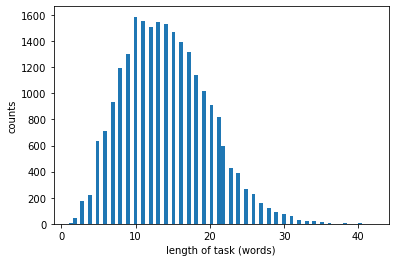

In [77]:
plt.hist(de_length,bins=80)
plt.xlabel('length of task (words)')
plt.ylabel('counts')
plt.savefig('imgs/len_de.png')
plt.savefig('imgs/len_de.pdf')
plt.show()

## tasks distribution on the level of DWAs

In [10]:
# There are 2085 DWAs 
# A DWA category contains an average of 11.29 tasks
# A DWA category can contain up to 122 tasks
dwa_counts = task_to_dwa['DWA ID'].value_counts()
print(dwa_counts.describe())
dwa_counts

count    2085.000000
mean       11.291607
std        10.368839
min         1.000000
25%         6.000000
50%         8.000000
75%        13.000000
max       122.000000
Name: DWA ID, dtype: float64


4.A.4.b.6.I07.D02    122
4.A.2.a.1.I03.D04    115
4.A.3.b.6.I08.D03    112
4.A.3.b.6.I11.D04     76
4.A.2.b.3.I01.D10     75
                    ... 
4.A.4.a.5.I10.D10      1
4.A.1.b.1.I02.D08      1
4.A.3.b.4.I05.D05      1
4.A.3.a.2.I47.D05      1
4.A.1.b.2.I07.D19      1
Name: DWA ID, Length: 2085, dtype: int64

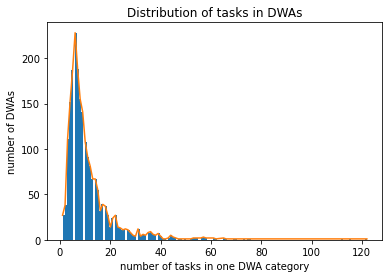

In [76]:

plt.hist(dwa_counts,bins=150)
plt.plot(dwa_counts.value_counts().sort_index())
plt.xlabel('number of tasks in one DWA category')
plt.ylabel('number of DWAs')
plt.title('Distribution of tasks in DWAs')
plt.savefig('imgs/dwa_task.png')
plt.savefig('imgs/dwa_task.pdf')
plt.show()

In [14]:
# one task can be mapped to up to 5 DWAs
task_counts = task_to_dwa['Task ID'].value_counts()
#print(task_counts)
print(task_counts.value_counts())
dwa_multilabels = task_counts.value_counts().tolist()
print('percentage of tasks have more than one label: ', sum(dwa_multilabels[1:])/len(task_to_dwa['Task ID']))

1    14752
2     3453
3      620
4        5
5        1
Name: Task ID, dtype: int64
percentage of tasks have more than one label:  0.17325744382619038


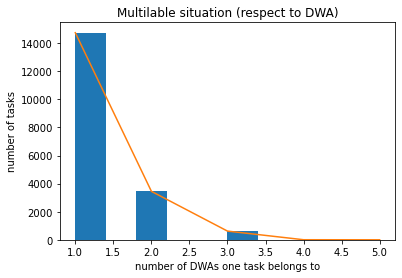

In [42]:
plt.hist(task_counts)
plt.plot(task_counts.value_counts().sort_index())
plt.xlabel('number of DWAs one task belongs to')
plt.ylabel('number of tasks')
plt.title('Multilable situation (respect to DWA)')

plt.savefig('imgs/mulila_dwa.png')
plt.savefig('imgs/mulila_dwa.pdf')

plt.show()

## tasks distribution on the level of IWAs

In [17]:
de_path = '/srv/scratch2/jinq/taskontology/task_to_GWA_IWA_DWA_DE.csv'

data_de = pd.read_csv(de_path, index_col=0)
print('numbers of records in tasks to DWAs(de):', data_de.shape[0])
data_de.head()

numbers of records in tasks to DWAs(de): 23543


,O*NET-SOC Code,Title,Task ID,Task,DWA ID,DWA Title,Date,Domain Source,Task_de,GWA ID,GWA Title,IWA ID,IWA Title,GWA_de,IWA_de,DWA_de
0,11-1011.00,Chief Executives,20461,"Review and analyze legislation, laws, or publi...",4.A.2.a.4.I09.D03,Analyze impact of legal or regulatory changes.,07/2014,Analyst,['Überprüfung und Analyse von Rechtsvorschrift...,4.A.2.a.4,Analyzing Data or Information,4.A.2.a.4.I09,Assess characteristics or impacts of regulatio...,['Analysieren von Daten oder Informationen'],['Beurteilung von Merkmalen oder Auswirkungen ...,['Analyse der Auswirkungen von rechtlichen ode...
1,11-1011.00,Chief Executives,20461,"Review and analyze legislation, laws, or publi...",4.A.4.b.6.I08.D04,Advise others on legal or regulatory complianc...,07/2014,Analyst,['Überprüfung und Analyse von Rechtsvorschrift...,4.A.4.b.6,Providing Consultation and Advice to Others,4.A.4.b.6.I08,Advise others on legal or regulatory matters.,['Beratung und Beratung der anderen'],['Sie beraten andere über rechtliche oder regu...,['Sie beraten andere über die rechtliche oder ...
2,11-1011.00,Chief Executives,8823,Direct or coordinate an organization's financi...,4.A.4.b.4.I09.D02,Direct financial operations.,03/2014,Analyst,['Direkt oder koordiniert eine Organisation fi...,4.A.4.b.4,"Guiding, Directing, and Motivating Subordinates",4.A.4.b.4.I09,Manage budgets or finances.,"['Guiding, Directing, and motivation Subordina...",['Verwaltung von Budgets oder Finanzen.'],['Direkte Finanzoperationen.']
3,11-1011.00,Chief Executives,8824,"Confer with board members, organization offici...",4.A.4.a.2.I03.D14,Confer with organizational members to accompli...,03/2014,Analyst,"['Controlling mit Vorstandsmitgliedern, Organi...",4.A.4.a.2,"Communicating with Supervisors, Peers, or Subo...",4.A.4.a.2.I03,Communicate with others about operational plan...,"['Kommunikation mit Supervisor, Peers, oder Su...",['Kommunizieren Sie mit anderen über operation...,['Begleitung von Organisationsmitgliedern zur ...
4,11-1011.00,Chief Executives,8825,Analyze operations to evaluate performance of ...,4.A.2.a.4.I07.D09,Analyze data to assess operational or project ...,03/2014,Analyst,"['Sie analysieren Operationen, um die Leistung...",4.A.2.a.4,Analyzing Data or Information,4.A.2.a.4.I07,Analyze data to improve operations.,['Analysieren von Daten oder Informationen'],['Analyse von Daten zur Verbesserung der Arbei...,"['Analysieren von Daten, um operationelle oder..."


In [18]:
# There are 332 distinctive IWAs 
# An IWA category contains an average of 70.9 tasks
# An IWA category can contain up to 545 tasks
iwa_counts = data_de['IWA ID'].value_counts()
print(iwa_counts.describe())
iwa_counts.head(3)

count    332.000000
mean      70.912651
std       68.655022
min        3.000000
25%       28.000000
50%       52.000000
75%       87.000000
max      545.000000
Name: IWA ID, dtype: float64


4.A.3.b.6.I08    545
4.A.4.b.4.I12    464
4.A.2.b.3.I01    395
Name: IWA ID, dtype: int64

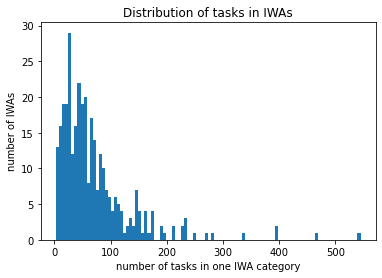

In [43]:

plt.hist(iwa_counts,bins=100)
# plt.plot(iwa_counts.value_counts().sort_index())
plt.xlabel('number of tasks in one IWA category')
plt.ylabel('number of IWAs')
plt.title('Distribution of tasks in IWAs')

plt.savefig('imgs/iwa_task.png')
plt.savefig('imgs/iwa_task.pdf')

plt.show()

In [22]:
# the mappings between tasks and IWA
task_iwa = data_de[['Task ID','IWA ID']].drop_duplicates()
print(len(task_iwa))# 22744 distinct mappings

task_iwa_counts = task_iwa['Task ID'].value_counts()
print(task_iwa_counts.value_counts()) # one task can be mapped to up to 4 IWAs

iwa_multilabels = task_iwa_counts.value_counts().tolist()
print('percentage of tasks have more than one IWA label: ', sum(iwa_multilabels[1:])/len(task_iwa))

22744
1    15302
2     3150
3      374
4        5
Name: Task ID, dtype: int64
percentage of tasks have more than one IWA label:  0.15516180091452692


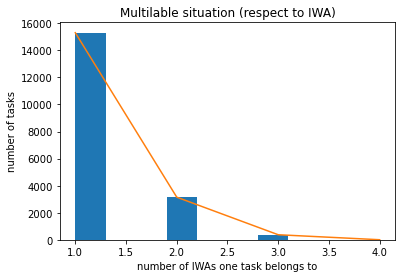

In [44]:
plt.hist(task_iwa_counts)
plt.plot(task_iwa_counts.value_counts().sort_index())
plt.xlabel('number of IWAs one task belongs to')
plt.ylabel('number of tasks')
plt.title('Multilable situation (respect to IWA)')

plt.savefig('imgs/mulila_iwa.png')
plt.savefig('imgs/mulila_iwa.pdf')

plt.show()

## tasks distribution on the level of GWAs

In [33]:
# There are 37 distinctive GWAs 
# A GWA category contains an average of 636 tasks
# A GWA category can contain up to 3055 tasks

gwa_counts = data_de['GWA ID'].value_counts()
print(gwa_counts.describe())
gwa_counts.head(3)

count      37.000000
mean      636.297297
std       604.690870
min        44.000000
25%       168.000000
50%       395.000000
75%       800.000000
max      3055.000000
Name: GWA ID, dtype: float64


4.A.3.a.2    3055
4.A.3.b.6    1758
4.A.4.b.4    1445
Name: GWA ID, dtype: int64

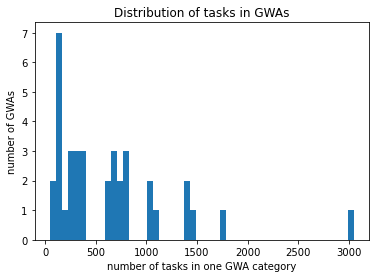

In [45]:

plt.hist(gwa_counts,bins=50)
#plt.plot(gwa_counts.value_counts().sort_index())
plt.xlabel('number of tasks in one GWA category')
plt.ylabel('number of GWAs')
plt.title('Distribution of tasks in GWAs')

plt.savefig('imgs/gwa_task.png')
plt.savefig('imgs/gwa_task.pdf')

plt.show()

In [36]:
# the mappings between tasks and GWA
task_gwa = data_de[['Task ID','GWA ID']].drop_duplicates()
print(len(task_gwa))# 21976 distinct mappings

task_gwa_counts = task_gwa['Task ID'].value_counts()
print(task_gwa_counts.value_counts())  # one task can be mapped to up to 3 GWAs

gwa_multilabels = task_gwa_counts.value_counts().tolist()
print('percentage of tasks have more than one IWA label: ', sum(gwa_multilabels[1:])/len(task_gwa))

21976
1    15897
2     2723
3      211
Name: Task ID, dtype: int64
percentage of tasks have more than one IWA label:  0.13350928285402258


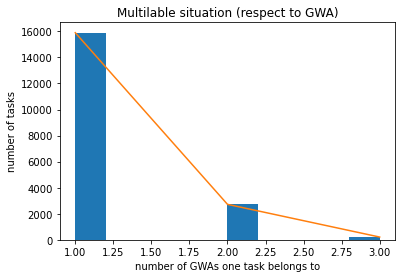

In [46]:
plt.hist(task_gwa_counts)
plt.plot(task_gwa_counts.value_counts().sort_index())
plt.xlabel('number of GWAs one task belongs to')
plt.ylabel('number of tasks')
plt.title('Multilable situation (respect to GWA)')

plt.savefig('imgs/mulila_gwa.png')
plt.savefig('imgs/mulila_gwa.pdf')

plt.show()

## Example Analysis


Exploring the multilabel distribution respect to different classification levels.   
Examples: task id: 22935, 22847, 22838, 21849, 23156

In [56]:
def dig_types(task_id):
    df = data_de[data_de['Task ID'] == task_id]
    print('distinct DWA labels: ',len(df['DWA ID']), '\n', df['DWA ID'].values)
    iwa_types = df['IWA ID'].drop_duplicates()
    print('distinct IWA labels: ',len(iwa_types), '\n', iwa_types.values)
    gwa_types = df['GWA ID'].drop_duplicates()
    print('distinct GWA labels: ',len(gwa_types), '\n', gwa_types.values)

In [60]:
data_de[data_de['Task ID'] == 22935]['Task'].tolist()


['Analyze burn conditions and results, and prepare postburn reports.',
 'Analyze burn conditions and results, and prepare postburn reports.',
 'Analyze burn conditions and results, and prepare postburn reports.',
 'Analyze burn conditions and results, and prepare postburn reports.',
 'Analyze burn conditions and results, and prepare postburn reports.']

In [67]:
# task: 22935
print('labels of task 22935: ')
dig_types(22935)

labels of task 22935: 
distinct DWA types:  5 
 ['4.A.1.a.2.I07.D10' '4.A.1.a.2.I09.D02' '4.A.1.a.2.I09.D05'
 '4.A.3.a.1.I02.D03' '4.A.3.b.6.I15.D04']
distinct IWA types:  4 
 ['4.A.1.a.2.I07' '4.A.1.a.2.I09' '4.A.3.a.1.I02' '4.A.3.b.6.I15']
distinct GWA types:  3 
 ['4.A.1.a.2' '4.A.3.a.1' '4.A.3.b.6']


In [68]:
# task: 22847
print('labels of task 22847: ')
dig_types(22847)

labels of task 22847: 
distinct DWA types:  4 
 ['4.A.1.a.2.I02.D03' '4.A.3.a.2.I09.D04' '4.A.3.a.2.I09.D05'
 '4.A.3.a.2.I09.D06']
distinct IWA types:  2 
 ['4.A.1.a.2.I02' '4.A.3.a.2.I09']
distinct GWA types:  2 
 ['4.A.1.a.2' '4.A.3.a.2']


In [69]:
# task: 22838
print('labels of task 22838: ')
dig_types(22838)

labels of task 22838: 
distinct DWA types:  4 
 ['4.A.2.b.2.I01.D01' '4.A.4.a.2.I02.D01' '4.A.4.a.2.I03.D01'
 '4.A.4.a.2.I05.D03']
distinct IWA types:  4 
 ['4.A.2.b.2.I01' '4.A.4.a.2.I02' '4.A.4.a.2.I03' '4.A.4.a.2.I05']
distinct GWA types:  2 
 ['4.A.2.b.2' '4.A.4.a.2']


In [70]:
# task: 21489
print('labels of task 21489: ')
dig_types(21489)

labels of task 21489: 
distinct DWA types:  4 
 ['4.A.2.b.2.I24.D03' '4.A.3.a.2.I20.D05' '4.A.3.b.4.I03.D03'
 '4.A.3.b.4.I04.D04']
distinct IWA types:  4 
 ['4.A.2.b.2.I24' '4.A.3.a.2.I20' '4.A.3.b.4.I03' '4.A.3.b.4.I04']
distinct GWA types:  3 
 ['4.A.2.b.2' '4.A.3.a.2' '4.A.3.b.4']


In [71]:
# task: 23156
print('labels of task 23156: ')
dig_types(23156)

labels of task 23156: 
distinct DWA types:  4 
 ['4.A.2.a.1.I04.D04' '4.A.4.b.3.I04.D20' '4.A.4.b.4.I01.D04'
 '4.A.4.b.4.I13.D04']
distinct IWA types:  4 
 ['4.A.2.a.1.I04' '4.A.4.b.3.I04' '4.A.4.b.4.I01' '4.A.4.b.4.I13']
distinct GWA types:  3 
 ['4.A.2.a.1' '4.A.4.b.3' '4.A.4.b.4']
